## **Basics**

#### **Datasets**  
https://www.kaggle.com/datasets/mathchi/diabetes-data-set  
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.  
Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

### **Types of Machine Learning**

#### **Supervised Learning**
- Labelled data
- Labelled inputs have corresponding output labels

**Types of Supervised Learning**
1. Classification - predict discrete classes
    - Binary classification
    - Multi-class classification
2. Regression - predict continuous data

#### **Unsupervised Learning**
- Model uses unlabelled data used to learn patterns in data

#### **Reinforcement Learning**
- A machine learning agent learns in an interactive environment based on a reward-penalty system.

### **How does an ML model work?**

A number of inputs (called feature vector) --> [MODEL] --> Output (prediction)

### **Features**
1. Qualitative data 
    - Nominal (without an inherent order) or ordinal data (has an inherent order)
    - We can use a technique such as one-hot encoding to feed such data to a model
    - For example, let's say the categories are nationalities. In such a case, there is no inherent order (or a way to quantify) the cateogies. Thus, we use one-hot encoding to assign numerical values to each category
2. Quantitative data
    - Numerical valued data
    - Can be discrete or continuous

#### In the dataset given below, each row (excluding the Outcome) is considered a feature vector. The target for a feature vector is the Outcome corresponsing to it.

Considering first row, [6, 148, 72, 35, 0, 33.6, 0.627, 50] is the feature vector and the target is 1

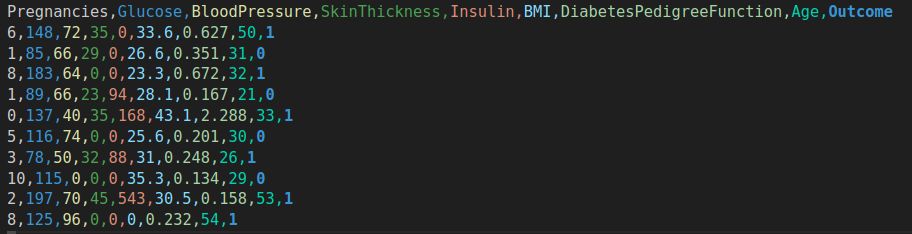

### **Splitting dataset**

A given dataset is split into three segments:
1. Training dataset - the model is trained on this dataset. The result helps us understand the difference between the expected values and predicted values, and this helps us adjust the model such that the losses are minimized/accuracy is improved. 
2. Validation dataset - this dataset is used during/after training to ensure that the model can handle unseen data. We can assess the model's performance on the validation dataset every now and then, at each iteration of the training or after it, to get a reality check. Unlike training, where the loss or difference in expected and predicted values is fed back to the model for readjustments and improving predictions, here we do not do that: the feedback loop is not closed.
3. Testing dataset - once we choose the most performant model among multiple models that were trained and validated, we feed the testing dataset to the model to check how well it is able to generalize on data that it has never seen before at any point during the training. The performance observed in this stage will be the final reported performance of the model

### **Loss**

Loss - difference between expected values and predicted values. Lower the loss, better the model.


#### **Loss used in regression**
1. Mean Absolute Error
2. Mean Square Error
3. Smooth Mean Absolute Error

#### **Loss used in classification**
1. Binary Cross-Entropy Loss
2. Hinge Loss
3. Smooth Mean Absolute Error

### **Accuracy**

Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome

In classification, we can predict accuracy as follows:  
### $Accuracy = {predictions_{correct} \over predictions_{total}}$

For binary classification:
### $Accuracy = {TP + TN \over TP + TN + FP + FN}$

## **Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data = pd.read_csv("data/magic04.data", names=columns)
print(data.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


#### In this dataset, the target variable is class, which has two categories: g and h
We encode "g" as 1 and "h" as 0

In [3]:
data["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
data["class"] = (data["class"] == "g").astype(int)

In [5]:
data["class"].unique()

array([1, 0])

In [6]:
print(data.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  


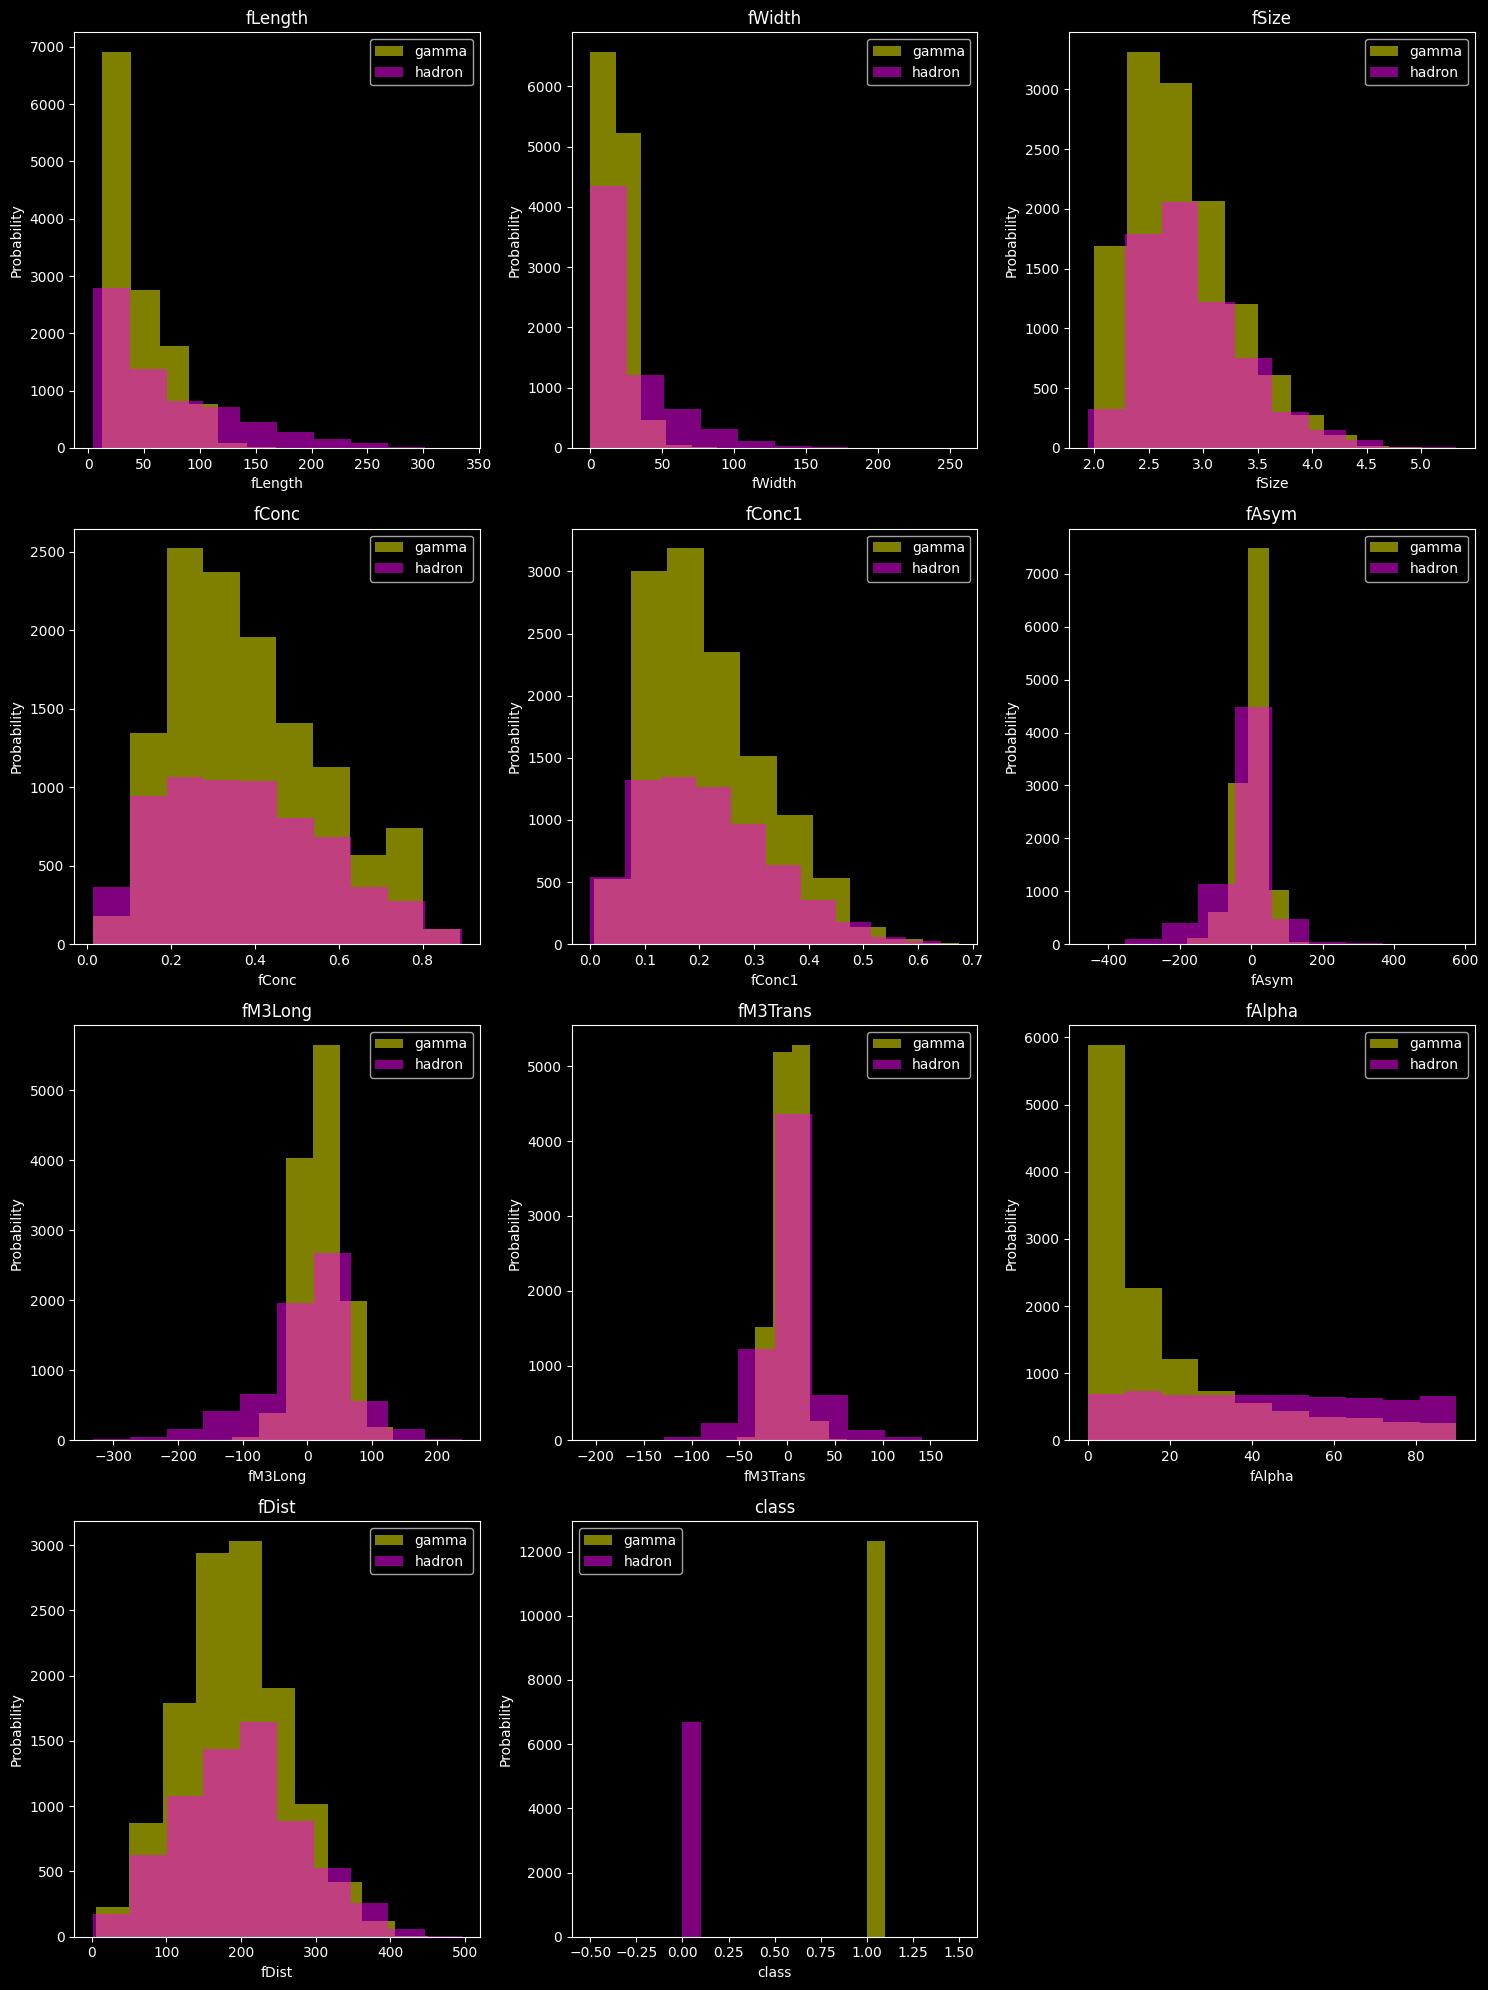

In [7]:
num_columns = len(columns)

nrows = (num_columns + 2) // 3
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

axes = axes.flatten()

for idx, i in enumerate(columns):
    ax = axes[idx]
    ax.hist(data[data["class"] == 1][i], label="gamma", alpha=0.5, color="yellow")
    ax.hist(data[data["class"] == 0][i], label="hadron", alpha=0.5, color="magenta")
    ax.set_title(i)
    ax.set_xlabel(i)
    ax.set_ylabel("Probability")
    ax.legend()

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Splitting Dataset**

In [8]:
train_dataset, validation_dataset, test_dataset = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])

/home/hrish/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
print(len(train_dataset[train_dataset["class"] == 0]))
print(len(train_dataset[train_dataset["class"] == 1]))

4020
7392


As we can see above, there is a very large difference between number of gamma and hadron. Thus, we will oversample the data so that the number of hadron and gamma is comparable. Else, there will be bias in the model which leads to inaccurate predictions.

In [10]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [11]:
train_dataset, X_train, y_train = scale_dataset(train_dataset, oversample=True)
validation_dataset, X_validation, y_validation = scale_dataset(validation_dataset, oversample=False)
test_dataset, X_test, y_test = scale_dataset(test_dataset, oversample=False)

Now, the number of gamma and hadron will be the same

In [12]:
print(sum(y_train == 0))
print(sum(y_train == 1))

7392
7392


## **K-Nearest Neighbours**

### **Concept**

The category to which a given data point falls into is determined by which category the majority of the data points nearest to the given data point falls in. "Nearest" here implies the smallest distance between the given data point and another data point, which in 2D, merely refers to the Euclidean distance between them.

$Euclidean$ $distance$ $D(a, b)$ $=$ $\sqrt{(x_a - x_b)^2 + (y_a - y_b)^2}$

Consider an example. Let's say we are having a dataset in which data points are given on a 2D plot. X-axis has the kilometers travelled by a car, and the Y-axis has the number of breakdowns. So, a point (1000, 2) corresponds to a car having travelled 1000 kilometers, and having 2 breakdowns.  
Now, each point falls into a category: Japanese or German, which is the country of origin of the car.

Let's say we are given a point (50000, 2) and we are to predict the country of origin of the car based on KNN, taking k = 3.  

We first compute the distance between the given point and every other data point on the plot. We then sort the distances in ascending order and take the top three points (basically, the three nearest points). Let's say that two of these points correspond to a car having country of origin as Japan, and the third point has country of origin as Germany. In other words, 2 of the 3 nearest neighbours are Japanese-made cars. Thus, we predict that the given data point (50000, 2) is also a car of Japanese origin.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_predictions = knn_model.predict(X_test)

#### **Classification Report Metrics**
1. Precision - a measure of how many of the predicted positive instances are actually positive.  
$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$  

2. Recall - a measure of how many of the actual positive instances were identified correctly by the model.  
$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$  

3. F1-Score - harmonic mean of precision and recall.  
$\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$  

4. Accuracy - ratio of correctly predicted instances to total number of instances.  
$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Instances}}$  

5. Macro Average - The average of precision, recall, and F1-score calculated independently for each class and then averaged.  
$\text{Macro Average} = \frac{1}{N} \sum_{i=1}^{N} \text{Metric}_i$  

6. Weighted Average - The average of precision, recall, and F1-score, weighted by the number of true instances for each class (support).  
$\text{Weighted Average} = \frac{1}{\text{Total Instances}} \sum_{i=1}^{N} (\text{Support}_i \cdot \text{Metric}_i)$  

7. Support - The number of actual occurrences of each class in the dataset.

**Concept of TP, TN, FP, FN**  
Let's say people are undergoing a test for diabetes.
1. The test report of a person who has diabetes comes out to be negative, stating that he does not have diabetes. This is an example of False Negative (FN).
2. The test report of a person who does not have diabetes comes out to be positive, stating that he has diabetes. This is an example of False Positive (FP).
3. The test report of a person having diabetes comes out as positive - he has diabates, and the test report also says that he has diabetes. This is a True Positive (TP).
4. The test report of a person who does not have diabetes comes out as negative - he does not have diabetes, and the report also says he does not have diabetes. this is a True Negative (TN).

In [16]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1343
           1       0.86      0.86      0.86      2461

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## **Naive Bayes**

### **Bayes Rule**

#### $P(A|B) = \frac{P(B|A).P(A)}{P(B)}$

P(A|B) is read as, the probability of event A occurring given that even B has occurred.

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [19]:
y_predictions = nb_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      1343
           1       0.73      0.90      0.81      2461

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



## **Logistic Regression**

### **Formula**
### **$p$ $=$ $\frac{1}{1 + e^{-{mx+b}}}$**

The RHS closely resembles the Sigmoid function, which is given by:

### **$S(x)$ $=$ $\frac{1}{1 + e^{-x}}$**

Therefore:
### **$p$ $=$ $S(mx + b)$**

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [23]:
y_predictions = lg_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1343
           1       0.85      0.83      0.84      2461

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## **Support Vector Machine**

Used for classification and regression tasks. In the context of classification, let's say we have a plot with data points that fall into one of two categories. An SVM works by finding a hyperplane (in two dimensions, this is a line) that best separates these two categories. The goal is to not only divide the data points into their respective categories but also to maximize the margin between the closest data points (known as support vectors) of each category and the hyperplane. The margin is the distance between the hyperplane and the nearest data point from either category. A larger margin indicates a better classification model, as it suggests a greater separation between the categories.  

**Issue** - not robust for data that has outliers.

In [25]:
from sklearn.svm import SVC

In [26]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [27]:
y_predictions = svm_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1343
           1       0.89      0.90      0.89      2461

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## **Classification Neural Network**

1. Consider a number of input features, ranging from $x_0$ to $x_n$  
2. Each of the features get multiplied by a weight, ranging from $w_0$ to $w_n$  
3. Each feature has a corresponding weight. So, for example, feature $x_0$ has a corresponding weight $w_0$. These products get summed and fed to a **neuron**.  
4. A neuron in a neural network is a computational unit that takes input, processes it, and passes on the output. It's inspired by biological neurons and typically performs a simple mathematical operation, like summing the inputs and applying an activation function to produce the output.  
5. To the value received in the neuron, a bias is added.  
6. The total obtained in the previous step is now fed to an activation function, which finally gives an output. The activation function is what makes the network a non-linear model: without it, it becomes just another linear model.

### **Gradient Descent and Backpropagation**
1. Gradient descent is a technique used to find the best parameters for a model by gradually adjusting them to minimize error.
2. This is done by calculating the slope of the error function. Once that is done, the parameters are moved in that direction which reduces the error.
3. In backpropagation, the error obtained at the end of an iteration is propagated backwards through the network to update the weights.
4. This helps in efficiently computing the gradients needed for gradient descent to adjust the weights and reduce the losses.

### **Activation Functions**

**Sigmoid**
1. Pro: Smooth gradient, which helps in making the optimization process easier.
2. Con: Prone to vanishing gradient problem, which can slow down or stop training.

**Tanh (Hyperbolic Tangent)**
1. Pro: Zero-centered output, which can help in faster convergence.
2. Con: Also suffers from the vanishing gradient problem, similar to the sigmoid function.

**ReLU (Rectified Linear Unit)**
1. Pro: Efficient computation and helps mitigate the vanishing gradient problem.
2. Con: Can cause neurons to "die" during training, where they stop learning entirely (dying ReLU problem).

**Leaky ReLU**
1. Pro: Allows a small gradient when the unit is not active, mitigating the dying ReLU problem.
2. Con: The choice of the slope for negative inputs is arbitrary and can affect model performance.

**Softmax**
1. Pro: Outputs a probability distribution, making it useful for multi-class classification problems.
2. Con: Computationally expensive due to the exponential calculations and can be less effective for imbalanced classes.

**ELU (Exponential Linear Unit)**
1. Pro: Helps the model learn faster and perform better by pushing mean unit activations closer to zero.
2. Con: More computationally intensive compared to ReLU.

**SELU (Scaled Exponential Linear Unit)**
1. Pro: Enables self-normalizing properties, which can lead to faster training and improved performance.
2. Con: Requires careful initialization and specific conditions (e.g., input data must be standardized) to work effectively.

In [29]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

2024-08-02 12:09:40.271448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 12:09:40.977613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 12:09:41.173229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-02 12:09:42.728403: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 12:09:47.572888: W tensorflow/compiler/tf2

In [31]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Cross-Entropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [32]:
def train_model(X_train, y_train, num_nodes, dropout_probability, learning_rate, batch_size, epochs):
    nn_model = Sequential([
        Dense(num_nodes, activation='relu', input_shape=(10, )),
        Dropout(dropout_probability),
        Dense(num_nodes, activation='relu'),
        Dropout(dropout_probability),
        Dense(1, activation='sigmoid')
    ])

    nn_model.compile(
        optimizer=Adam(learning_rate), 
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=False)
    
    return nn_model, history

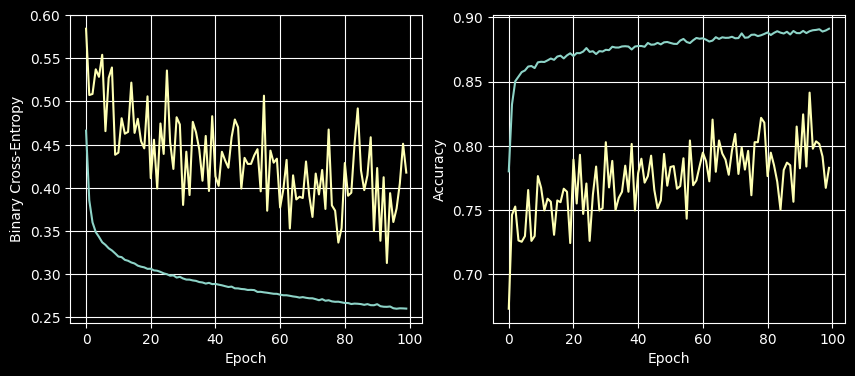

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8641 - loss: 0.3179
32 nodes, 0 dropout, 0.001 learning rate, 64 batch size


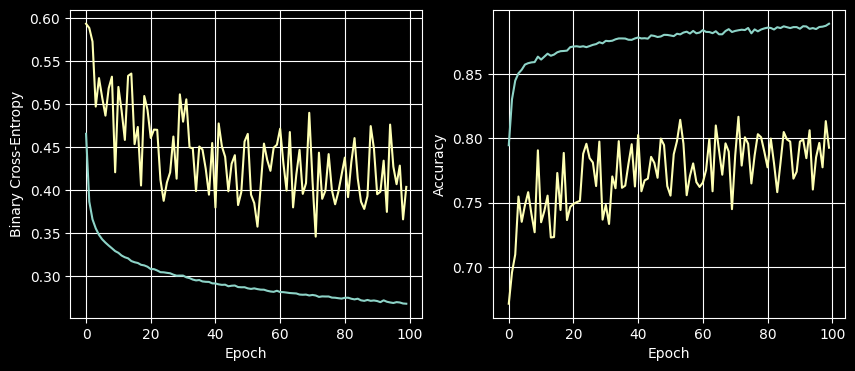

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3121
32 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


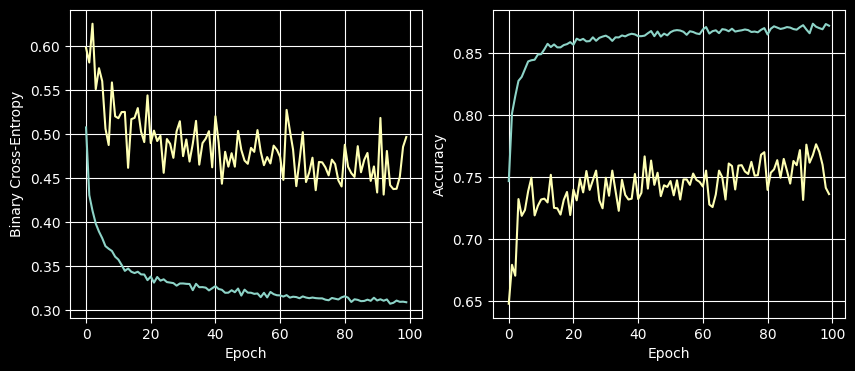

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.2990
32 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


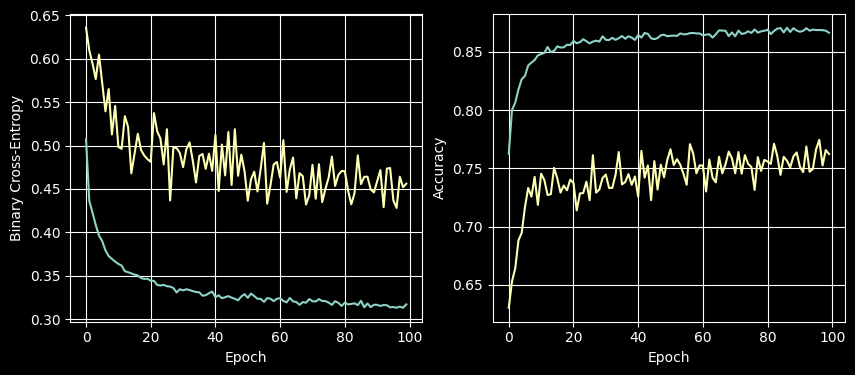

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.3015
64 nodes, 0 dropout, 0.001 learning rate, 32 batch size


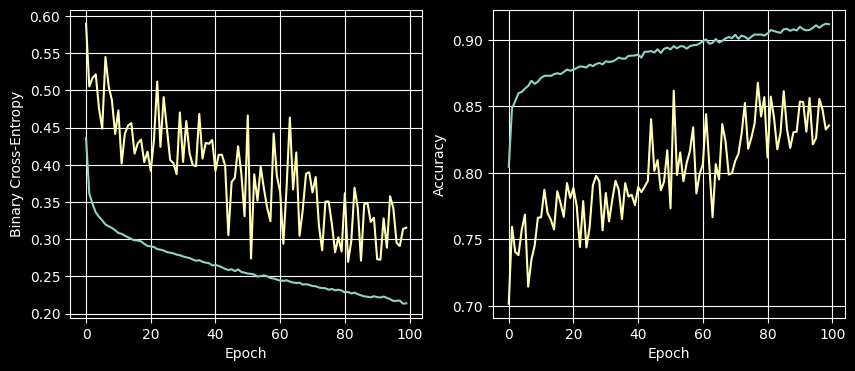

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8676 - loss: 0.3376
64 nodes, 0 dropout, 0.001 learning rate, 64 batch size


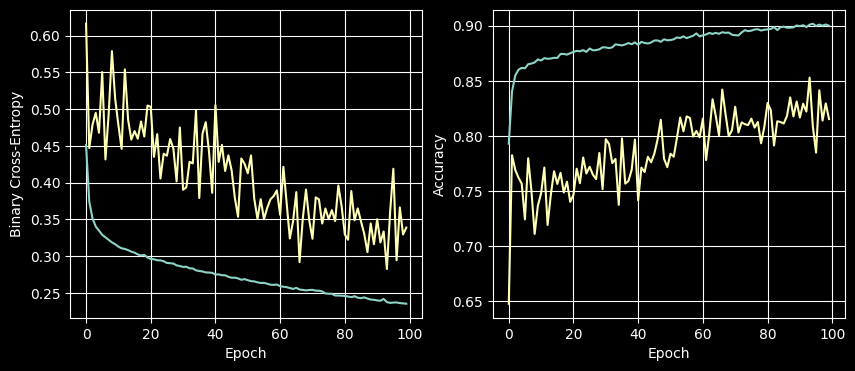

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3233
64 nodes, 0.2 dropout, 0.001 learning rate, 32 batch size


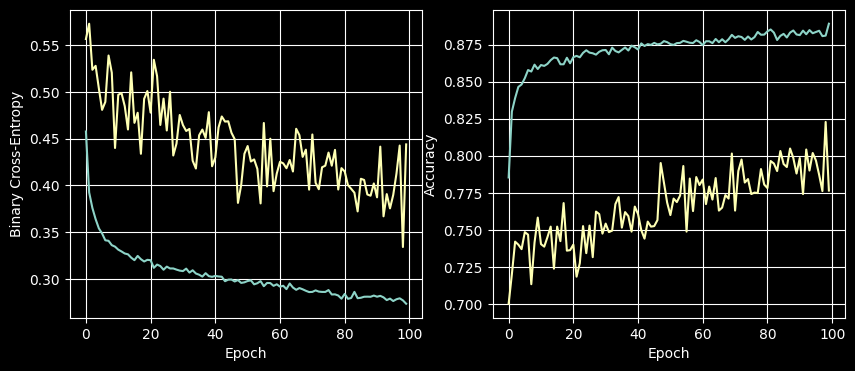

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8818 - loss: 0.2922
64 nodes, 0.2 dropout, 0.001 learning rate, 64 batch size


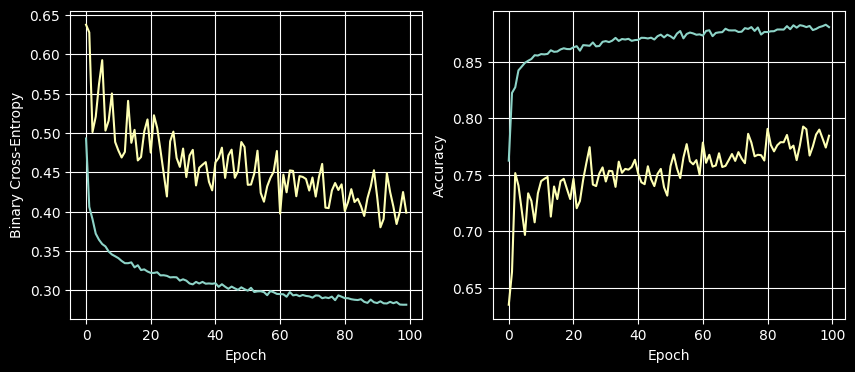

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.2923


In [33]:
least_validation_loss = float('inf')
least_loss_model = None
epochs = 100
learning_rate = 0.001
for num_nodes in [32, 64]:
    for dropout_probability in [0, 0.2]:
            for batch_size in [32, 64]:
                print(f"{num_nodes} nodes, {dropout_probability} dropout, {learning_rate} learning rate, {batch_size} batch size")
                model, history = train_model(X_train, y_train, num_nodes, dropout_probability, learning_rate, batch_size, epochs)
                plot_history(history)
                validation_loss = model.evaluate(X_validation, y_validation)[0]

                if validation_loss < least_validation_loss:
                    least_validation_loss = validation_loss
                    least_loss_model = model

In [34]:
y_predictions = least_loss_model.predict(X_test)
y_predictions = (y_predictions > 0.5).astype(int).reshape(-1, )

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1343
           1       0.87      0.95      0.91      2461

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



## **Linear Regression**

### **Assumptions**
1. Linearity - if y increases or decreases at a constant rate when x increases, then the data can be said to be linear. 
2. Independence - a given data point does not have influence on another data point. Each data point is independent, and must not rely or affect one another.
3. Normality - the residuals must be normally distributed along the line of best fit.
4. Homoscedasticity - variance of points must be constant throughout. In other words, spread of points is similar at any given region.

### **Equation**
#### $y = b_0 + b_1x$

### **Residual**
The difference between a given point and its corresponding residual on the regression line.  
Sum of squared residuals - this penalizes an error to a greater extent than if we only consider the residual.  
In linear regression, we try reducing this sum of squared residuals.  

#### $residual$ $=$ $|y_i - \hat{y}_i|$

### **Evaluating a Linear Regression Model**
1. Mean Absolute Error
#### $MAE$ $=$ $\frac{\sum{|y_i - \hat{y}_i|}}{n}$

2. Mean Squared Error
#### $MSE$ $=$ $\frac{\sum{|y_i - \hat{y}_i|}^2}{n}$

3. Root Mean Squared Error
#### $RMSE$ $=$ $\sqrt{\frac{\sum{|y_i - \hat{y}_i|}^2}{n}}$

4. R-squared - Coefficient of Determination
#### $R^2$ $=$ $1 - \frac{RSS}{TSS}$
RSS - sum of squared residuals  
TSS - total sum of squares  
#### $RSS$ $=$ $\sum{(y_i - \hat{y_i})^2}$
#### $TSS$ $=$ $\sum{(y_i - \bar{y_i})^2}$

**Note:** here, $\hat{y_i}$ refers to the predicted value, and $\bar{y_i}$ refers to average value

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [53]:
dataset_columns = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
data = pd.read_csv("data/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis = 1)

In [54]:
data.columns = dataset_columns
data["functional"] = (data["functional"] == "Yes").astype(int)
data.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [55]:
data = data[data["hour"] == 12]
data = data.drop(["hour"], axis = 1)
data.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [56]:
data = data.drop(["wind", "visibility", "functional"], axis = 1)
data.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [57]:
train_dataset, validation_dataset, test_dataset = np.split(data.sample(frac = 1), [int(0.6 * len(data)), int(0.8 * len(data))])

/home/hrish/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [58]:
def get_xy(data, y_label, x_labels=None):
    data = copy.deepcopy(data)
    if x_labels is None:
        X = data[[c for c in data.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = data[x_labels[0]].values.reshape(-1, 1)
        else:
            X = data[x_labels].values

    y = data[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y  

In [59]:
_, X_train_temp, y_train_temp = get_xy(train_dataset, "bike_count", x_labels=["temp"])
_, X_validation_temp, y_validation_temp = get_xy(validation_dataset, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test_dataset, "bike_count", x_labels=["temp"])

In [60]:
temp_regressor = LinearRegression()
temp_regressor.fit(X_train_temp, y_train_temp)

LinearRegression()

In [61]:
print(temp_regressor.coef_, temp_regressor.intercept_)

[[20.32347564]] [361.03370576]


In [62]:
temp_regressor.score(X_test_temp, y_test_temp)

0.2327804812112816

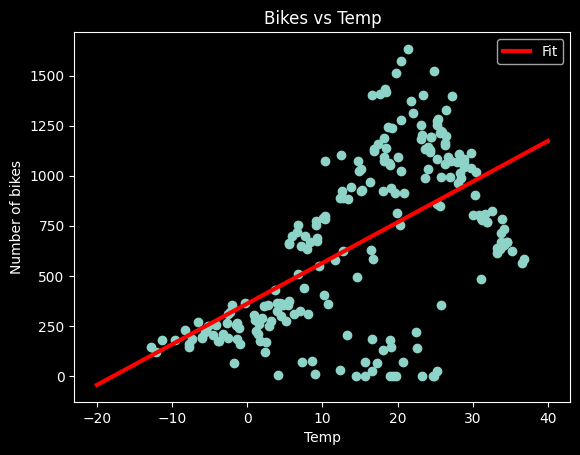

In [63]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_regressor.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

### **Multiple Linear Regression**
#### $y = b_0 + b_1x + b_2x_2 + ... + b_nx_n$

In [64]:
data.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [65]:
train_dataset, validation_dataset, test_dataset = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])
_, X_train_all, y_train_all = get_xy(train_dataset, "bike_count", x_labels=data.columns[1:])
_, X_validation_all, y_validation_all = get_xy(validation_dataset, "bike_count", x_labels=data.columns[1:])
_, X_test_all, y_test_all = get_xy(test_dataset, "bike_count", x_labels=data.columns[1:])

/home/hrish/miniconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [66]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train_all, y_train_all)

LinearRegression()

In [67]:
multiple_regressor.score(X_test_all, y_test_all)

0.2417162591418659

## **Regression with Neural Network**

In [86]:
from keras.layers import Normalization, Dense
from keras import Sequential
from keras.optimizers import Adam

In [87]:
temp_normalizer = Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/home/hrish/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
temp_nn_model = Sequential([
    temp_normalizer,
    Dense(1)
])

In [89]:
temp_nn_model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

In [92]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    epochs=1000,
    validation_data=(X_validation_temp, y_validation_temp)
)

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 689820.1875 - val_loss: 722560.3750
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 643539.1875 - val_loss: 721172.2500
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 612963.5625 - val_loss: 719786.4375
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 527980.2500 - val_loss: 718438.8750
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 618996.1250 - val_loss: 717028.5000
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 594725.0625 - val_loss: 715647.8125
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 572728.8125 - val_loss: 714278.4375
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 672642.8750 - val_loss: 712875.3125
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 639515.8125 - val_loss: 711491.5625
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 618078.6250 - val_loss: 710128.6875
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss:

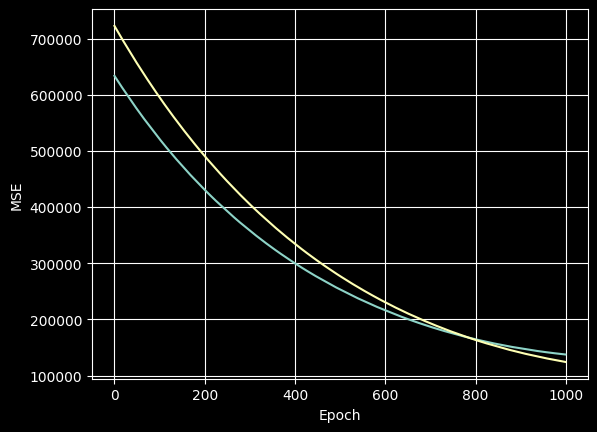

In [95]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True)

    plt.show()
plot_loss(history=history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


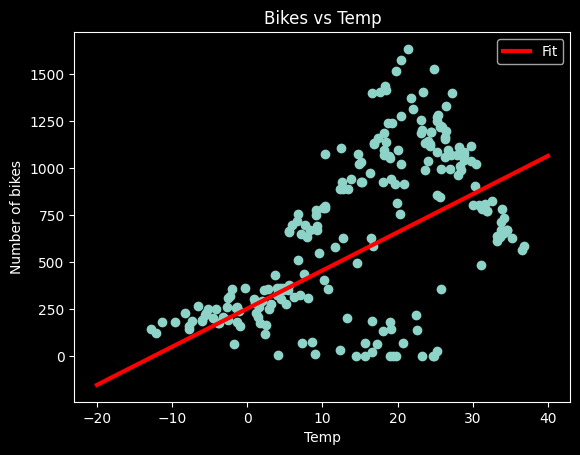

In [97]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

#### Implementation using a neural network (instead of a single node like in the previous implementation)

In [103]:
temp_normalizer = Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

temp_nn_model = Sequential([
    temp_normalizer,
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
])

temp_nn_model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

In [104]:
history = temp_nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_validation_temp, y_validation_temp),
    epochs=100
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 653208.9375 - val_loss: 724138.2500
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 662036.3750 - val_loss: 723960.0000
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 622401.5000 - val_loss: 723722.0625
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 647380.0000 - val_loss: 723476.8125
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 636497.3750 - val_loss: 723246.8750
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 676107.8750 - val_loss: 723002.2500
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 639450.5625 - val_loss: 722727.7500
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 630151.4375 - val_loss: 722404.8125
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 673180.0625 - val_loss: 722021.1250
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 636418.6250 - val_loss: 721570.6875
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 676859.25

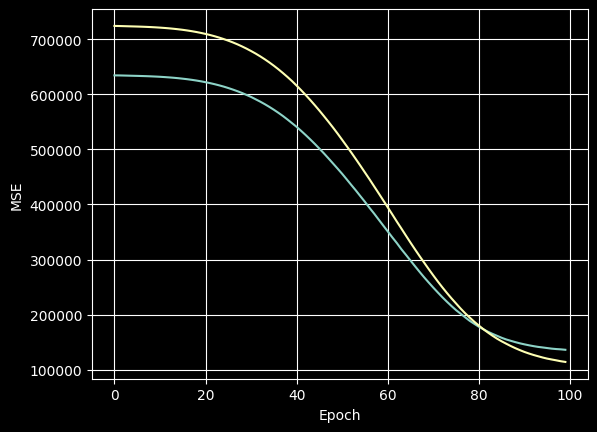

In [105]:
plot_loss(history=history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/stepWARNING:tensorflow:6 out of the last 127 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x730f7c1d30a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


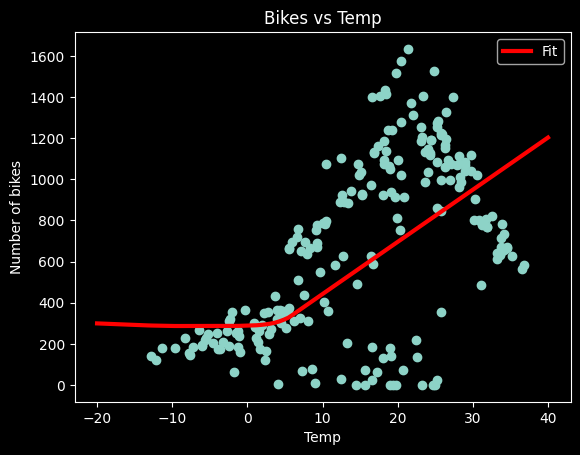

In [106]:
plt.scatter(X_train_temp, y_train_temp)
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

## **K-Means Clustering**

- Unsupervised machine learning algorithm
- Calculates k clusters from data - k is predefined by us
- For example, if k=3, the model creates three different clusters from the dataset

#### How are the clusters calculated?
1. Choose k random points to be centroids (not from the data set)
2. Calculate the distance of each point to the centroids
3. We assign the points to their closest centroid (expectation-maximization), and form the clusters
4. We compute new centroids from the clusters formed in step 3 (maximization)
5. Steps 2 to 4 are repeated until we find an optimal solution (the best possible clusters)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
data = pd.read_csv("data/seeds_dataset.txt", names=columns, sep="\s+")

In [4]:
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


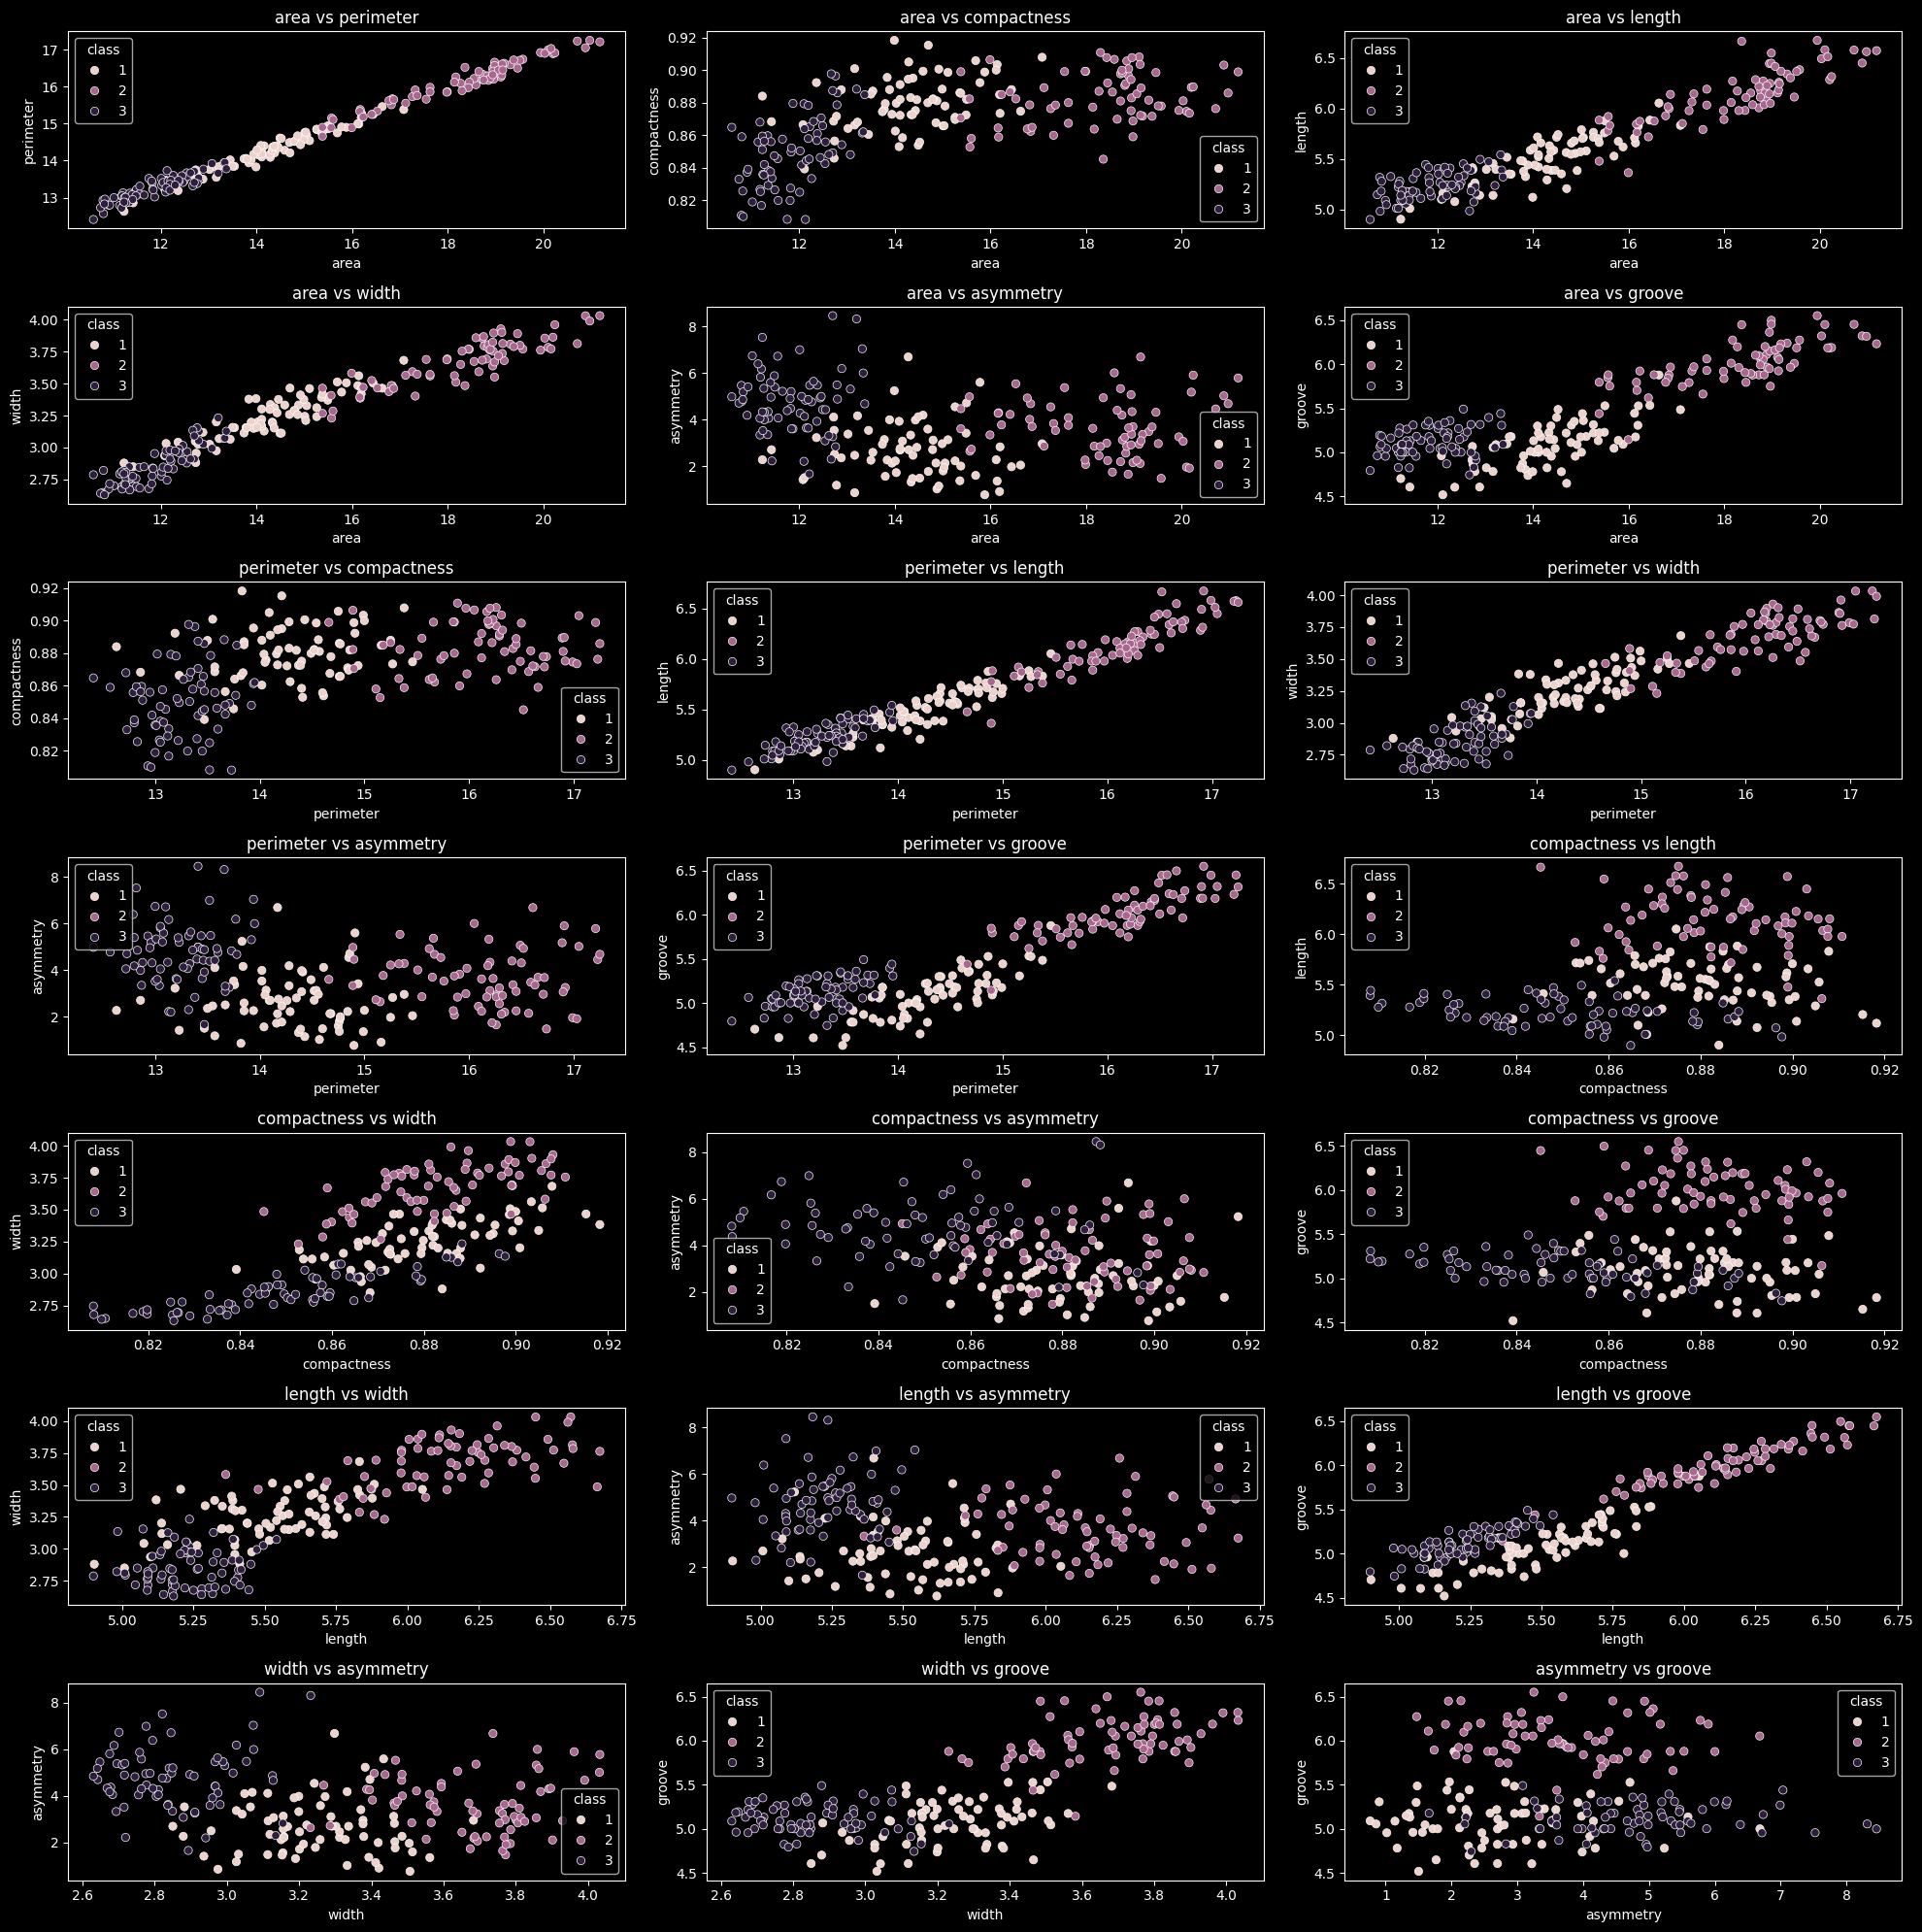

In [5]:
num_cols = len(columns)

num_plots = (num_cols - 1) * (num_cols - 2) // 2
ncols = 3
nrows = (num_plots // ncols) + (num_plots % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
axes = axes.flatten()

plot_index = 0
for i in range(num_cols - 1):
    for j in range(i + 1, num_cols - 1):
        x_label = columns[i]
        y_label = columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=data, hue='class', ax=axes[plot_index])
        axes[plot_index].set_title(f'{x_label} vs {y_label}')
        plot_index += 1

for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
x = "perimeter"
y = "asymmetry"
X = data[[x, y]].values

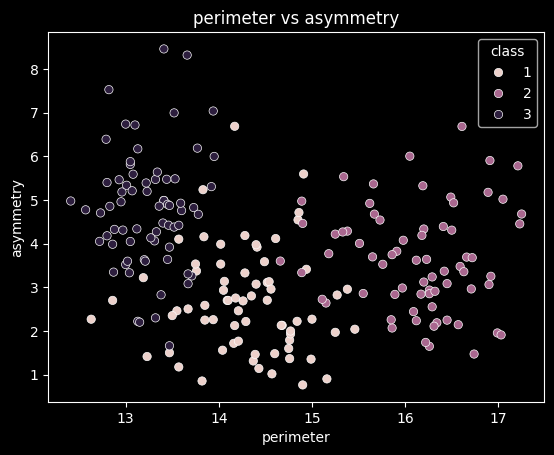

In [8]:
x_label = x
y_label = y
sns.scatterplot(x=x_label, y=y_label, data=data, hue='class')
plt.title(f'{x_label} vs {y_label}')
plot_index += 1

In [9]:
kmeans = KMeans(n_clusters=3).fit(X)

In [10]:
print(
    "Cluster centers:", kmeans.cluster_centers_,
    "\n\nLabels:", kmeans.labels_
)

Cluster centers: [[16.2490625   3.60664062]
 [13.4776      5.03764   ]
 [14.17873239  2.3717493 ]] 

Labels: [2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2
 0 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 1 2 0 2 2 0 1 1 1 1 1 1 2 1
 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1]


In [11]:
data["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [12]:
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=[x, y, "class"])

[]

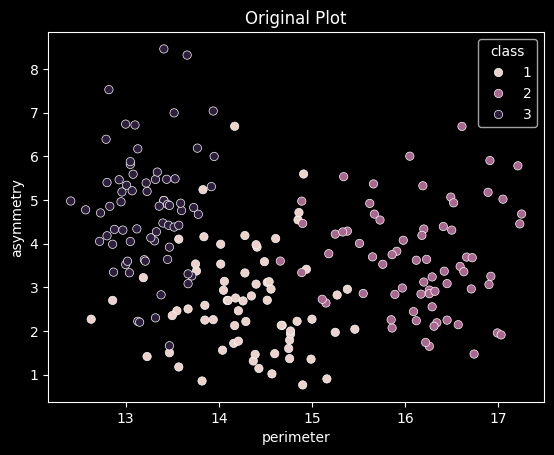

In [17]:
sns.scatterplot(x=x, y=y, hue="class", data=data)
plt.title("Original Plot")
plt.plot()

[]

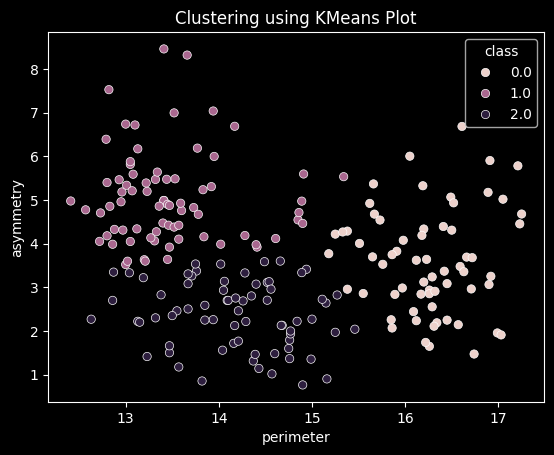

In [19]:
sns.scatterplot(x=x, y=y, hue="class", data=cluster_df)
plt.title("Clustering using KMeans Plot")
plt.plot()

## **Principal Component Analysis**

- Reduces the number of dimensions in large datasets to principal components that retain most of the original information.
- It does this by transforming potentially correlated variables into a smaller set of variables, called principal components.  
- The first principal component captures the most variation in the data, but the second principal component captures the maximum variance that is orthogonal to the first principal component, and so on.  
_Source: IBM, GFG_

In [20]:
from sklearn.decomposition import PCA

In [28]:
X = pd.read_csv("data/seeds_dataset.txt", names=columns[:-1], sep="\s+")

In [29]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)
X.shape

(210, 7)

In [31]:
transformed_x.shape

(210, 2)

In [33]:
transformed_x[:5]

array([[-1.56100462, -0.82326615],
       [-2.22520067, -1.84375186],
       [-0.67903912, -1.27145433],
       [-0.92859931, -1.62565251],
       [-2.28929795, -1.23053933]])

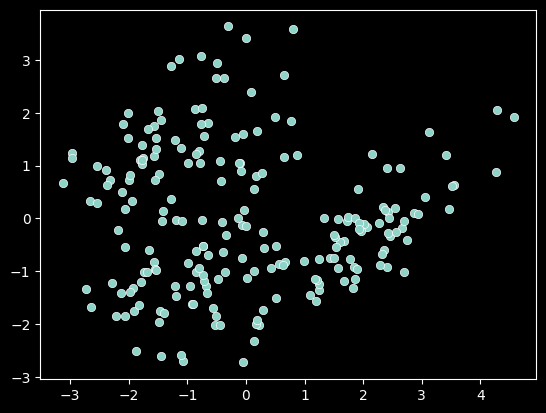

In [35]:
sns.scatterplot(x=transformed_x[:,0], y=transformed_x[:,1])
plt.show()

In [36]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns = ["pca1", "pca2", "class"])

In [37]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, data["class"].values.reshape(-1, 1))), columns = ["pca1", "pca2", "class"])

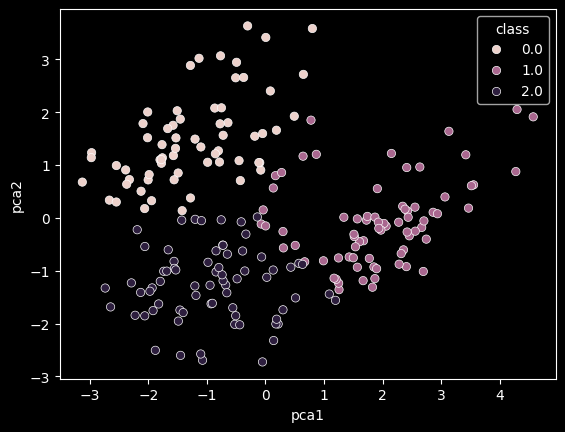

In [38]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.show()

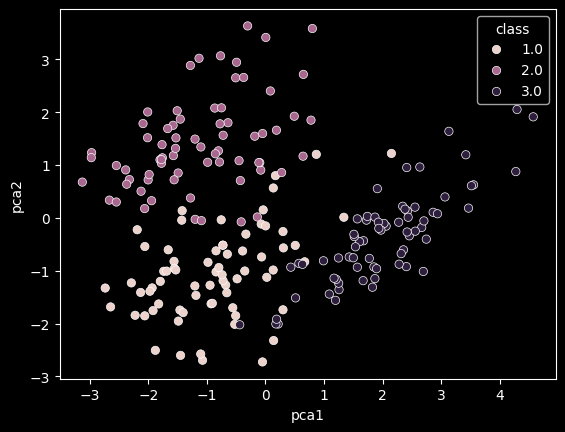

In [39]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.show()